In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({'A':[1,4,7], 'B':[1,7,7]})
df

,A,B
0,1,1
1,4,7
2,7,7


In [3]:
df.mean()

A    4.0
B    5.0
dtype: float64

In [4]:
# portfolio expected return   weight*mean
0.5*4 + 0.5*5

4.5

$$ \sigma_p^2 = w_1^2 \times \sigma_1^2 + w_2^2 \times \sigma_2^2 + 2 \times w_1 \times w_2 \times \text{covariance} $$



In [5]:
df.cov()

,A,B
A,9.0,9.0
B,9.0,12.0


In [6]:
port_var = (0.5**2 *9.0) + (0.5**2 *12.0) + 2*0.5*0.5*9.0
port_var

9.75

In [7]:
# portfolio std
port_var**0.5

3.122498999199199

$$ \sigma_p^2 = \mathbf{w}^T \Sigma \mathbf{w} $$


In [8]:
# Dot Product portfolio variance
# w is the weight vector of the portfolio.
# Σ is the variance-covariance matrix.   

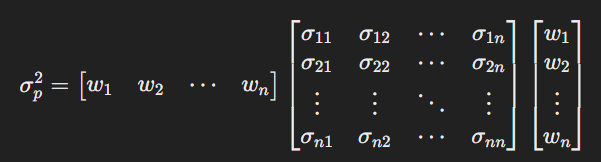

In [9]:
w = np.ones(len(df.columns)) / len(df.columns)
w

array([0.5, 0.5])

In [10]:
# portfolio var
w.dot(np.transpose(w).dot(df.cov()))

9.75

In [11]:
# portfolio std
w.dot(np.transpose(w).dot(df.cov())) **0.5

3.122498999199199

In [12]:
import yfinance as yf

df = yf.download(['KO','IBKR','AAPL'],start='2015-01-01')['Adj Close']
df

[*********************100%%**********************]  3 of 3 completed


Ticker,AAPL,IBKR,KO
Date,,,
2015-01-02,24.435268,27.104450,31.347849
2015-01-05,23.746887,26.964394,31.347849
2015-01-06,23.749125,26.796337,31.585886
2015-01-07,24.082132,26.908379,31.980150
2015-01-08,25.007429,27.655315,32.366978
...,...,...,...
2024-03-11,172.750000,107.730003,59.761982
2024-03-12,173.229996,109.099998,60.019920
2024-03-13,171.130005,108.459999,60.634998


In [13]:
return_df = df.dropna().pct_change()
return_df

Ticker,AAPL,IBKR,KO
Date,,,
2015-01-02,NaN,NaN,NaN
2015-01-05,-0.028172,-0.005167,0.000000
2015-01-06,0.000094,-0.006233,0.007593
2015-01-07,0.014022,0.004181,0.012482
2015-01-08,0.038423,0.027759,0.012096
...,...,...,...
2024-03-08,0.010237,-0.011904,0.001346
2024-03-11,0.011832,-0.001668,0.012097
2024-03-12,0.002779,0.012717,0.004316


In [14]:
return_df.dropna(inplace=True)
(return_df +1).cumprod() -1    # cumulative returns

Ticker,AAPL,IBKR,KO
Date,,,
2015-01-05,-0.028172,-0.005167,0.000000
2015-01-06,-0.028080,-0.011368,0.007593
2015-01-07,-0.014452,-0.007234,0.020170
2015-01-08,0.023415,0.020324,0.032510
2015-01-09,0.024513,-0.001034,0.021120
...,...,...,...
2024-03-08,5.987032,2.981265,0.883628
2024-03-11,6.069699,2.974624,0.906414
2024-03-12,6.089343,3.025169,0.914642


<Axes: xlabel='Date'>

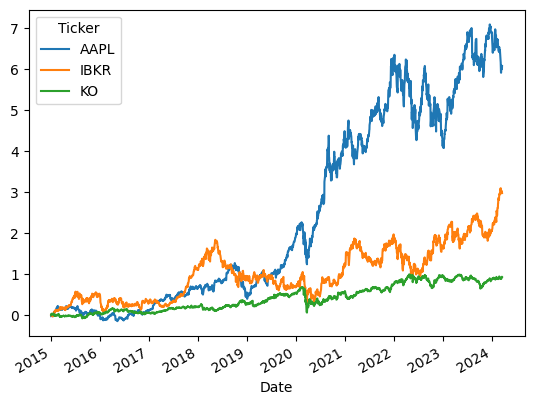

In [15]:
((return_df +1).cumprod() -1 ).plot()

In [16]:
return_df.mean()

Ticker
AAPL    0.001012
IBKR    0.000794
KO      0.000350
dtype: float64

In [17]:
return_df.std()

Ticker
AAPL    0.018187
IBKR    0.019836
KO      0.011429
dtype: float64

In [18]:
return_df.cov()

Ticker,AAPL,IBKR,KO
Ticker,,,
AAPL,0.000331,0.000143,0.000079
IBKR,0.000143,0.000393,0.000067
KO,0.000079,0.000067,0.000131


In [19]:
return_df.corr()

Ticker,AAPL,IBKR,KO
Ticker,,,
AAPL,1.000000,0.395791,0.381488
IBKR,0.395791,1.000000,0.297513
KO,0.381488,0.297513,1.000000


In [20]:
W = np.ones(len(return_df.columns)) / len(return_df.columns)
W

array([0.33333333, 0.33333333, 0.33333333])

In [21]:
# portfolio expected return
port_exp = W.dot(return_df.mean())
port_exp

0.0007183325407235026

In [22]:
# portfolio std
port_std = W.dot(np.transpose(W).dot(return_df.cov())) **0.5
port_std

0.012622502538083629

In [23]:
#assume risk free rate = 0 
# sharp_ratio of the portfolio
sharp_ratio = port_exp / port_std
sharp_ratio

0.05690888463331306

In [24]:
# sharp_ratio of the components
return_df.mean() / return_df.std()

Ticker
AAPL    0.055622
IBKR    0.040004
KO      0.030612
dtype: float64

In [25]:
return_df

Ticker,AAPL,IBKR,KO
Date,,,
2015-01-05,-0.028172,-0.005167,0.000000
2015-01-06,0.000094,-0.006233,0.007593
2015-01-07,0.014022,0.004181,0.012482
2015-01-08,0.038423,0.027759,0.012096
2015-01-09,0.001073,-0.020932,-0.011032
...,...,...,...
2024-03-08,0.010237,-0.011904,0.001346
2024-03-11,0.011832,-0.001668,0.012097
2024-03-12,0.002779,0.012717,0.004316


In [26]:
return_df.mean(axis=1)

Date
2015-01-05   -0.011113
2015-01-06    0.000485
2015-01-07    0.010228
2015-01-08    0.026092
2015-01-09   -0.010297
                ...   
2024-03-08   -0.000107
2024-03-11    0.007420
2024-03-12    0.006604
2024-03-13   -0.002580
2024-03-14    0.000964
Length: 2314, dtype: float64

In [27]:
(return_df.mean(axis=1) +1).cumprod() -1  # portfolio cumulative returns

Date
2015-01-05   -0.011113
2015-01-06   -0.010633
2015-01-07   -0.000514
2015-01-08    0.025565
2015-01-09    0.015005
                ...   
2024-03-08    3.326340
2024-03-11    3.358442
2024-03-12    3.387224
2024-03-13    3.375904
2024-03-14    3.380123
Length: 2314, dtype: float64

<Axes: xlabel='Date'>

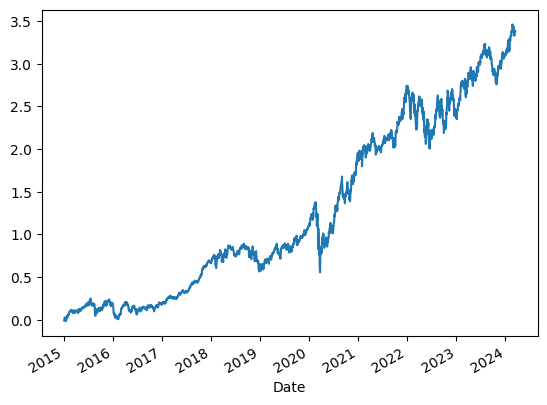

In [28]:
((return_df.mean(axis=1) +1).cumprod() -1 ).plot()